## **1. Installation**

Load your dataset

In [1]:
# tensorflow backend important 
%tensorflow_version 1.x

# up grade h5py
! pip install --upgrade h5py==2.10.0

# clone Mask-RCNN from Github: 
! git clone https://github.com/Koussailakadi/Mask_RCNN.git 

%matplotlib inline

TensorFlow 1.x selected.


'!pip install --upgrade h5py==2.10.0\n!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip\n!unzip Mask_RCNN_basic_1.zip\n%matplotlib inline'

In [2]:
import os
import sys
sys.path.append("/content/Mask_RCNN/")
print(os.getcwd())
print(os.listdir(os.getcwd()))
from mrcnn import*
from mrcnn.m_rcnn import*

/content
['.config', 'Mask_RCNN', 'Mask_RCNN_basic_1.zip', 'sample_data']
VERS 0.2


Using TensorFlow backend.


## **2. Image Dataset**

Load your annotated dataset


In [6]:
# Extract Images
images_path = "with_cracks.zip"
annotations_path = "annotations_coco.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 687 images


In [7]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
dataset_test = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "test")
class_number = dataset_train.count_classes()
print('All images :',len(dataset_train.image_ids)+len(dataset_val.image_ids)+len(dataset_test.image_ids))
print('Train:',len(dataset_train.image_ids))
print('Validation:',len(dataset_val.image_ids))
print('test: ',len(dataset_test.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/annotations_coco.json
Annotation json path:  /content/annotations_coco.json
Annotation json path:  /content/annotations_coco.json
All images : 687
Train: 602
Validation: 43
test:  42
Classes: 2


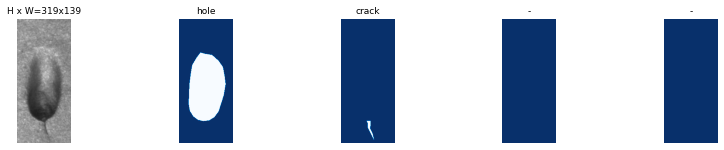

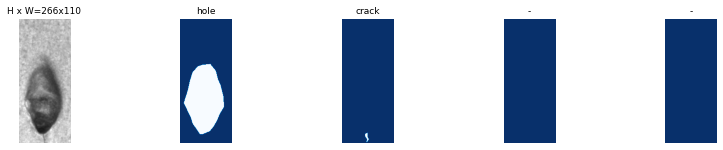

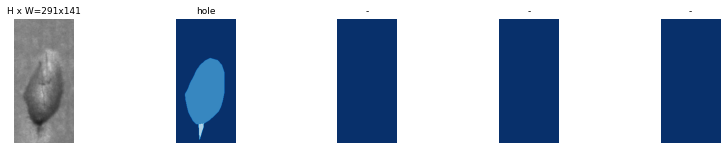

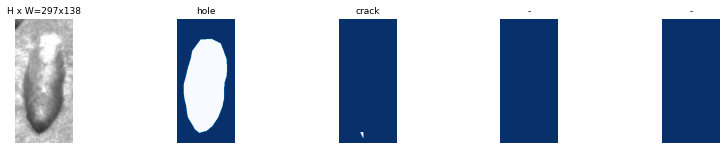

In [8]:
# Load image samples
display_image_samples(dataset_train)

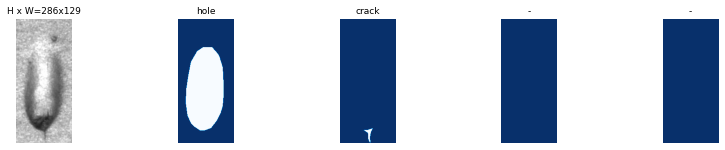

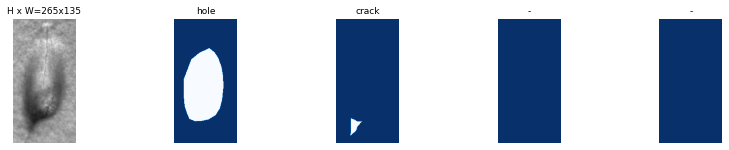

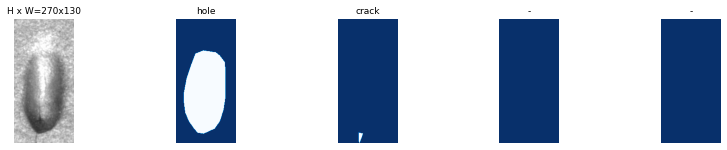

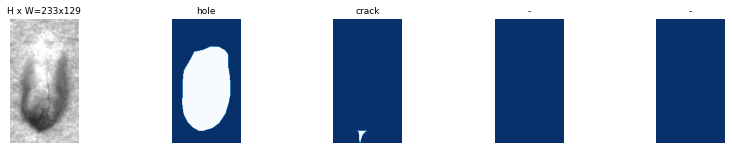

In [9]:
# Load image samples
display_image_samples(dataset_val)

##**3. Training**

Train Mask RCNN on your custom Dataset.

In [10]:
class CustomConfig(Config):
    """Configuration for training on the custom  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "object"

    IMAGES_PER_GPU = 2

    NUM_CLASSES = 1 + 2  # Background + Car and truck

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100 

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

    

# Load Configuration
config = CustomConfig()
config.display()
model = load_training_model(config)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_val, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/object20220121T1932/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn

## **4. Detection (test your model on a random image)**

In [20]:
# Load Test Model
# The latest trained model will be loaded
#test_model, inference_config = load_test_model()
#LOAD MODEL. Create model in inference mode
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)


# Get path to saved weights
model_path = model.find_last()
print(model_path)

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)



Instructions for updating:
Use `tf.cast` instead.
/content/Mask_RCNN/logs/object20220121T1255/mask_rcnn_object_0050.h5
Loading weights from  /content/Mask_RCNN/logs/object20220121T1255/mask_rcnn_object_0050.h5
Re-starting from epoch 50


original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  253.00000  uint8
Trained model result
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Annotation


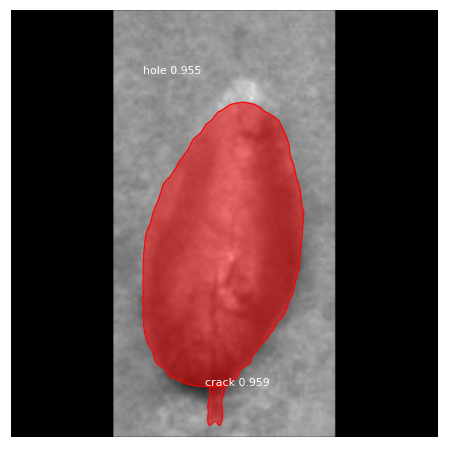

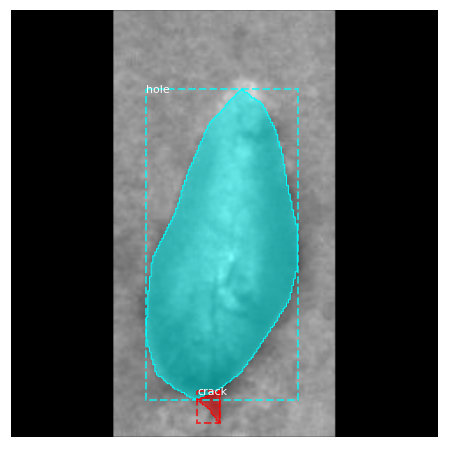

In [21]:
# Test on a random image
test_random_image(model, dataset_val, config)

original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8


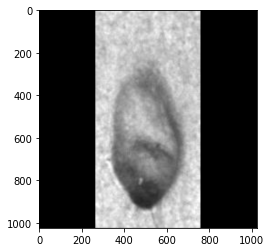

Trained model result
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


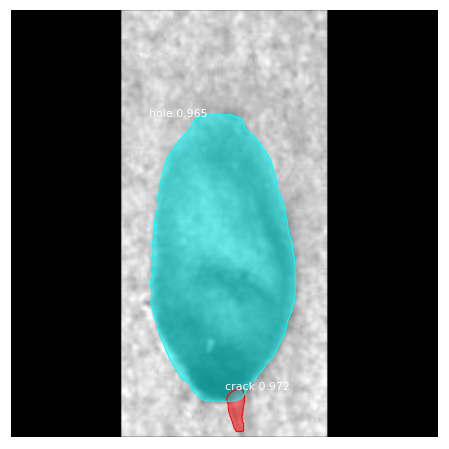

In [44]:
#image_id = random.choice(dataset_val.image_ids)
image_id=224
original_image, image_meta, gt_class_id, gt_bbox, gt_mask = \
    modellib.load_image_gt(dataset_train, config,
                            image_id, use_mini_mask=False)

log("original_image", original_image)
plt.imshow(original_image)
plt.show()
# log("image_meta", image_meta)
# log("gt_class_id", gt_class_id)
# log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

# Model result
print("Trained model result")
results = model.detect([original_image], verbose=1)
r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'],
                            dataset_val.class_names, r['scores'], ax=get_ax(), show_bbox=False)

In [22]:
dataset_val.image_ids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75])

In [23]:
dataset_train.image_ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18